<a href="https://colab.research.google.com/github/toluwee/Kmeans-with-TF/blob/master/KMeans_with_TFv2_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
def ScatterPlot(X, Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
  plt.xlabel('Height (in)')
  plt.ylabel('Weight (lbs)')
  plt.show()

### Data

Weight and height data obtained from [SOCR Data Dinov 020108 HeightsWeights](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

   Height  Weight
0   65.78  112.99
1   71.52  136.49
2   69.40  153.03
3   68.22  142.34
4   67.79  144.30


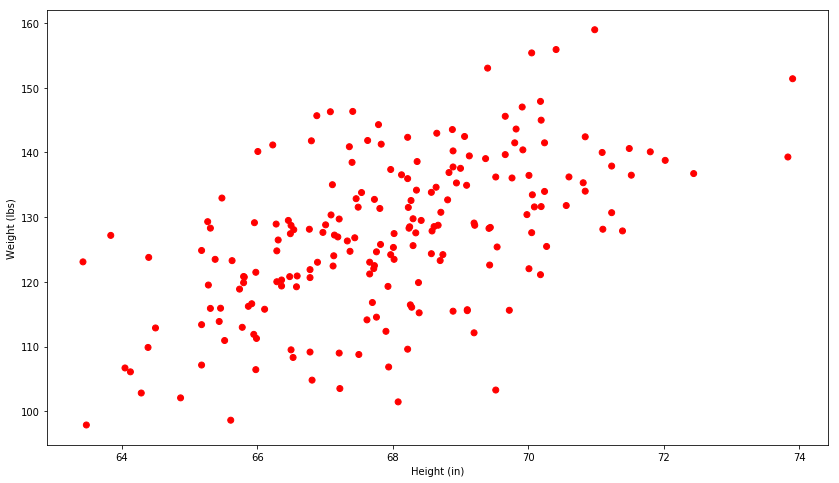

In [3]:
hw_frame = pd.read_csv(
  'https://datasciencefiles.s3.us-east-2.amazonaws.com/hw-data.txt', delim_whitespace=True,
  header=None, names=['Index', 'Height', 'Weight'])
hw_frame.drop('Index', 1, inplace=True)
print hw_frame.head(5)
  
ScatterPlot(hw_frame.Height, hw_frame.Weight)

In [4]:
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(hw_frame.as_matrix(), dtype=tf.float32), num_epochs=1)


In [5]:
num_clusters = 4
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

W1014 15:48:48.277904 140468861896576 estimator.py:1821] Using temporary folder as model directory: /tmp/tmpLapoIL


In [6]:
# train
num_iterations = 10

for _ in xrange(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()

cluster_indices = list(kmeans.predict_cluster_index(input_fn))


W1014 15:48:48.297760 140468861896576 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1635: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1014 15:48:48.299798 140468861896576 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/training/training_util.py:236: initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package 

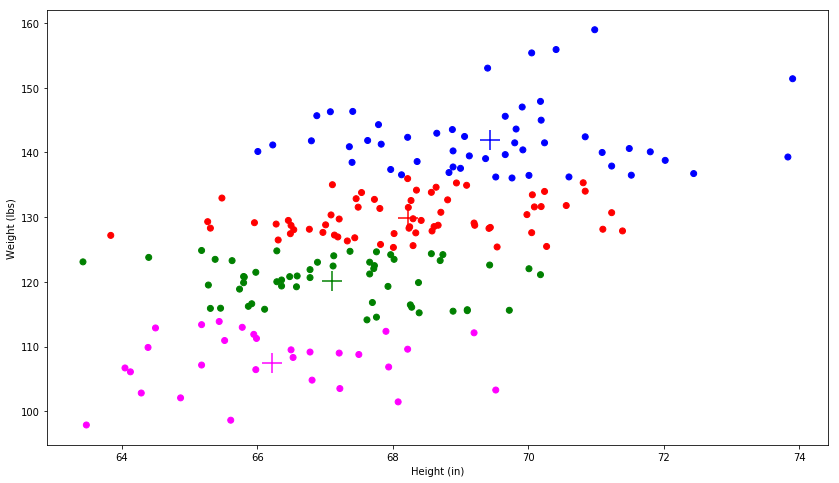

In [7]:
ScatterPlot(hw_frame.Height, hw_frame.Weight, cluster_indices, cluster_centers)